In [ ]:
# 📘 Notebook 01: Puertos y Ondas – Fundamentos de los Wave Digital Filters

# 🧠 Objetivo del notebook
# Entender el concepto de puerto eléctrico, las variables de onda (a, b) y su relación con voltaje y corriente.
# Fundamento esencial para todos los elementos WDF (one-ports y adaptadores).

# -------------------------------------------------------------
# 📘 SECCIÓN 1 – ¿Qué es un puerto eléctrico?
# -------------------------------------------------------------

"""
Un **puerto eléctrico** es un punto de conexión entre un circuito y su entorno.

Está definido por dos variables:
- Voltaje (v): diferencia de potencial
- Corriente (i): flujo de carga hacia el circuito

Estas dos variables determinan completamente el comportamiento del puerto.

Ejemplo:
    Un resistor entre dos nodos forma un puerto con v = tensión entre nodos, i = corriente que pasa.

"""

'\nUn **puerto eléctrico** es un punto de conexión entre un circuito y su entorno.\n\nEstá definido por dos variables:\n- Voltaje (v): diferencia de potencial\n- Corriente (i): flujo de carga hacia el circuito\n\nEstas dos variables determinan completamente el comportamiento del puerto.\n\nEjemplo:\n    Un resistor entre dos nodos forma un puerto con v = tensión entre nodos, i = corriente que pasa.\n\n'

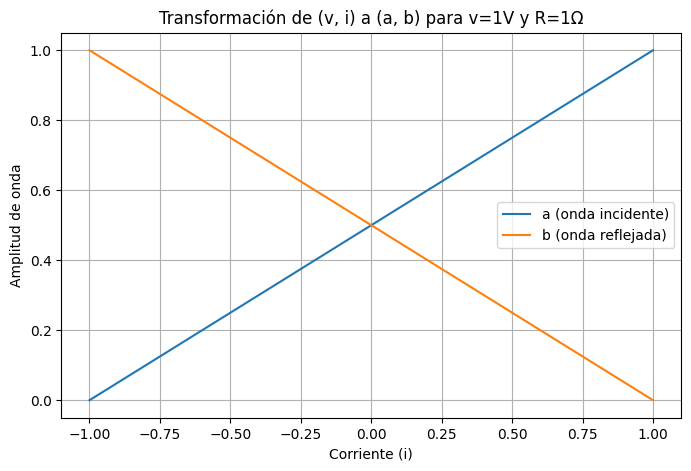

In [2]:
# -------------------------------------------------------------
# 📘 SECCIÓN 2 – Definición de variables de onda
# -------------------------------------------------------------

"""
Los Wave Digital Filters no operan directamente con (v, i), sino con **ondas incidentes (a)** y **reflejadas (b)**.

Estas ondas están definidas como:
    a = (v + R * i) / 2   -> onda incidente
    b = (v - R * i) / 2   -> onda reflejada

Donde R es la **resistencia de puerto** elegida para el elemento.

Estas transformaciones permiten una formulación más estable y pasiva del sistema.
"""

import numpy as np
import matplotlib.pyplot as plt

# Ejemplo: conversión de (v, i) a (a, b)
def vi_to_ab(v: float, i: float, R: float):
    a = (v + R * i) / 2
    b = (v - R * i) / 2
    return a, b

# Reconstrucción de v, i a partir de a, b
def ab_to_vi(a: float, b: float, R: float):
    v = a + b
    i = (a - b) / R
    return v, i

# Simulación simple
i_vals = np.linspace(-1, 1, 100)
v_vals = 1.0  # constante
R = 1.0

ab_pairs = [vi_to_ab(v_vals, i, R) for i in i_vals]
a_vals, b_vals = zip(*ab_pairs)

plt.figure(figsize=(8, 5))
plt.plot(i_vals, a_vals, label='a (onda incidente)')
plt.plot(i_vals, b_vals, label='b (onda reflejada)')
plt.xlabel('Corriente (i)')
plt.ylabel('Amplitud de onda')
plt.title('Transformación de (v, i) a (a, b) para v=1V y R=1Ω')
plt.legend()
plt.grid()
plt.show()


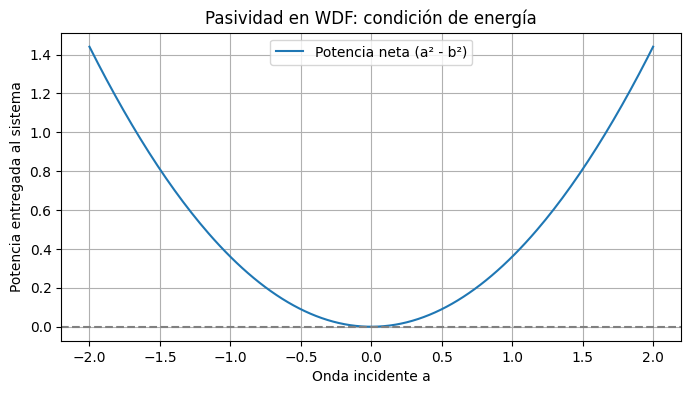

In [ ]:
# -------------------------------------------------------------
# 📘 SECCIÓN 3 – Significado físico: energía y pasividad
# -------------------------------------------------------------

"""
El producto v * i representa la **potencia instantánea** que entra al puerto.

En variables de onda:
    potencia = a^2 - b^2

Esto significa que:
- Si a^2 > b^2, el elemento disipa energía ⇒ pasivo
- Si a^2 < b^2, el elemento genera energía ⇒ activo (o mal modelado)

Esta reformulación es crucial para garantizar **pasividad en WDF**, incluso con elementos discretos o no lineales.
"""

# Ejemplo visual
a = np.linspace(-2, 2, 200)
b = 0.8 * a

power_in = a**2 - b**2

plt.figure(figsize=(8, 4))
plt.plot(a, power_in, label='Potencia neta (a² - b²)')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Onda incidente a')
plt.ylabel('Potencia entregada al sistema')
plt.title('Pasividad en WDF: condición de energía')
plt.legend()
plt.grid()
plt.show()

# -------------------------------------------------------------
# Próxima sección: elementos one-port algebraicos (Resistor, Short, Open, etc.)
# Cubriremos esto en el Notebook 02: OnePorts_Algebraicos.ipynb
# Basado en §1.2 de la tesis de Kurt Werner.